<br>
<center> <h2>Maestría en Inteligencia Analítica para la Toma de Decisiones</h2> </center>
<center> <h3>Modelos avanzados para análisis de datos 1</h3> </center>
<br>
<h3>Exercise 14</h3>
<h3>Predict rating using LSTM</h3>
 

##### Presentado por:
    Lupe Pinzon Wagner                (200813063)
    Diego Andres Ojeda Vargas         (201924250)
    Héctor Fabián Rodríguez Mayorga   (201921382)
    Iván josé Galindo Gaviria         (201924193)

 

<h4> Julio 2020</h4>
<br>

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import numpy  as np
import string
import plotly
from nltk.stem import PorterStemmer 

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [4]:
dataTraining = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [5]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [6]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


# Exercise 14.1

- Remove stopwords 
- Lowercase
- split the text in words 
- pad_sequences

Para remover las stopwors, importamos el listado desde el paquete nltk.corpus

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\57312\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words("spanish"))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\57312\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
dataTraining['plot'][9784]

'two drifters are passing through a western town ,  when news comes in that a local farmer has been murdered and his cattle stolen .  the townspeople ,  joined by the drifters ,  form a posse to catch the perpetrators .  they find three men in possession of the cattle ,  and are determined to see justice done on the spot .'

A continuación se reemplazan los caracteres especiales.

In [12]:
plots = plots.to_list()

for i in range(0,len(plots)):
  plots[i] = str(plots[i]).replace("'","")
  plots[i] = str(plots[i]).replace(".","")
  plots[i] = str(plots[i]).replace("]","")
  plots[i] = str(plots[i]).replace("[","")
  plots[i] = str(plots[i]).replace(":","")
  plots[i] = str(plots[i]).replace("/","")
  plots[i] = str(plots[i]).replace("-","")
  plots[i] = str(plots[i]).replace("?","")
  plots[i] = str(plots[i]).replace("¿","")
  plots[i] = str(plots[i]).replace(",","")
  plots[i] = str(plots[i]).replace('\n', ' ').replace('\r', '')

In [13]:
plots[0]

'most is the story of a single father who takes his eight year  old son to work with him at the railroad drawbridge where he is the bridge tender   a day before   the boy meets a woman boarding a train   a drug abuser   at the bridge   the father goes into the engine room   and tells his son to stay at the edge of the nearby lake   a ship comes   and the bridge is lifted   though it is supposed to arrive an hour later   the train happens to arrive   the son sees this   and tries to warn his father   who is not able to see this   just as the oncoming train approaches   his son falls into the drawbridge gear works while attempting to lower the bridge   leaving the father with a horrific choice   the father then lowers the bridge   the gears crushing the boy   the people in the train are completely oblivious to the fact a boy died trying to save them   other than the drug addict woman   who happened to look out her train window   the movie ends   with the man wandering a new city   and me

En la siguiente parte del código: detectamos cuales son las stopwords y las eliminamos, separamos cada palabra y las convertimos en minúscula.

In [33]:
#detectamos cuales son stopwords 
stop_words = set(stopwords.words("english"))
final = []


for i in range(0,len(plots)):
  without_stop_words = []
  stopword = [] 
  sentence = plots[i]
  words = nltk.word_tokenize(sentence)
  for word in words:
      if word in stop_words:
          stopword.append(word)
      else:
          without_stop_words.append(word.lower())
  final.append(without_stop_words)

In [34]:
X = final

Finalmente usamos la funcion pad_sequences para ajustar las palabras a la derecha

In [35]:
l = []
for i in range(0,len(X)): 
    tam = len(X[i])
    l.append(tam)

In [36]:
print(min(l))
print(max(l))
print(sum(l)/len(l))

0
818
69.99822672577581


Como cada uno de los plots tiene un tamaño promedio de 70, será el valor que usaremos como parametro para el pad_secuences

#### Create vocabulary

In [37]:
for i in range(0,len(X)):
  X[i] = str(X[i]).replace("'","")
  X[i] = str(X[i]).replace(".","")
  X[i] = str(X[i]).replace("]"," ")
  X[i] = str(X[i]).replace("["," ")
  X[i] = str(X[i]).replace(":"," ")
  X[i] = str(X[i]).replace("/"," ")
  X[i] = str(X[i]).replace("-","")
  X[i] = str(X[i]).replace("?"," ")
  X[i] = str(X[i]).replace("¿"," ")
  X[i] = str(X[i]).replace(","," ")
  #X[i] = str(X[i]).replace('\n', ' ').replace('\r', '')

In [38]:
X[1000]

' dominick  eugene  twins  dominick  little  bit  slow  due  accident  youth  live  together  dominick  working  garbage  man  put  eugene  medical  school  relationship  becomes  strained  eugene  must  decide  devotion  brother  need  go  away  complete  training  things  also  helped  dominick  co  worker  eugene  budding  romance '

Con la data asjutada hacemos la creación del vocabulario

In [39]:
voc = ''.join(str(v+" ") for v in X)

In [40]:
z = list(dict.fromkeys(voc.split()))
vocabulary = {x: idx + 1 for idx, x in enumerate(z)}

vocabulary

{'story': 1,
 'single': 2,
 'father': 3,
 'takes': 4,
 'eight': 5,
 'year': 6,
 'old': 7,
 'son': 8,
 'work': 9,
 'railroad': 10,
 'drawbridge': 11,
 'bridge': 12,
 'tender': 13,
 'day': 14,
 'boy': 15,
 'meets': 16,
 'woman': 17,
 'boarding': 18,
 'train': 19,
 'drug': 20,
 'abuser': 21,
 'goes': 22,
 'engine': 23,
 'room': 24,
 'tells': 25,
 'stay': 26,
 'edge': 27,
 'nearby': 28,
 'lake': 29,
 'ship': 30,
 'comes': 31,
 'lifted': 32,
 'though': 33,
 'supposed': 34,
 'arrive': 35,
 'hour': 36,
 'later': 37,
 'happens': 38,
 'sees': 39,
 'tries': 40,
 'warn': 41,
 'able': 42,
 'see': 43,
 'oncoming': 44,
 'approaches': 45,
 'falls': 46,
 'gear': 47,
 'works': 48,
 'attempting': 49,
 'lower': 50,
 'leaving': 51,
 'horrific': 52,
 'choice': 53,
 'lowers': 54,
 'gears': 55,
 'crushing': 56,
 'people': 57,
 'completely': 58,
 'oblivious': 59,
 'fact': 60,
 'died': 61,
 'trying': 62,
 'save': 63,
 'addict': 64,
 'happened': 65,
 'look': 66,
 'window': 67,
 'movie': 68,
 'ends': 69,
 'man':

In [41]:
max_plot_len = 70
X = [x[:max_plot_len] for x in X]
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [42]:
X_pad = sequence.pad_sequences(X, maxlen=max_plot_len)
X_pad

array([[    0,     0,     0, ...,  5158,  3008,  5158],
       [    0,     0,     0, ...,  5158, 13572,  3395],
       [    0,     0,     0, ...,   263,  3008,  3395],
       ...,
       [    0,     0,     0, ...,  1899,  3395,  3395],
       [    0,     0,     0, ...,  6003,  4873,  4873],
       [    0,     0,     0, ...,  5158,  3395,   263]])

# Exercise 14.2

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

## Using LSTM

In [24]:
import keras
from keras import backend as K

Using TensorFlow backend.
C:\Users\57312\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\57312\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\57312\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\57312\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [25]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [26]:
from livelossplot import PlotLossesKeras
%matplotlib inline

In [27]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


#### Modelo

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=42)

In [44]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 256, input_length=max_plot_len))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()        

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 70, 256)           9872128   
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 9,954,369
Trainable params: 9,954,369
Non-trainable params: 0
_________________________________________________________________


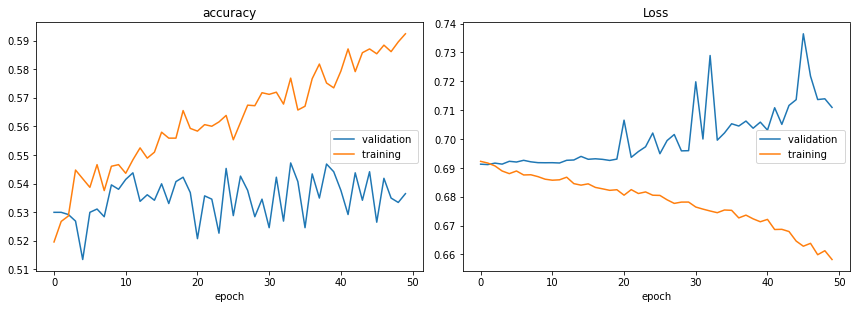

accuracy
	validation       	 (min:    0.513, max:    0.547, cur:    0.536)
	training         	 (min:    0.520, max:    0.592, cur:    0.592)
Loss
	validation       	 (min:    0.691, max:    0.736, cur:    0.711)
	training         	 (min:    0.658, max:    0.692, cur:    0.658)


In [45]:
model.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=256, epochs=50, verbose=1,
          callbacks=[PlotLossesKeras()])

In [46]:
y_pred = model.predict_classes(X_test)[:,0]

print((y_pred == y_test).mean())

0.5364543361473523


Para el modelo se uso el parametro de batch de 256 y LSTM 64, basados en los parametros usados en trabajos previos sobre este tema:
https://github.com/avijit2verma/movie-genre-prediction
https://www.researchgate.net/publication/322929271_Movie_Genre_Classification_from_Plot_Summaries_Using_Bidirectional_LSTM
